In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install Pillow

You should consider upgrading via the 'c:\users\majid\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\majid\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\majid\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image
from os import listdir
import math

#### Read and show images

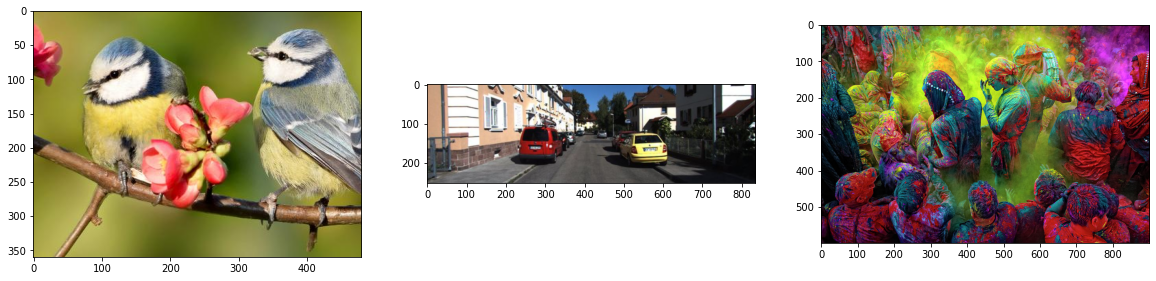

In [2]:
path = 'data/2/'
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
i=0
for img_name in listdir(path):
    img = Image.open(path+img_name)
    axs[i].imshow(img)
    axs[i].plot()
    i += 1

#### Convert images to vectors

In [3]:
def img2vec(path):
    """ This function reads images and convert them to vectors """
    data = []
    orig_img_shape = []
    for img_name in listdir(path):
        img = Image.open(path+img_name)
        img = np.asarray(img)
        orig_img_shape.append(img.shape)
        img_vec = img.reshape((img.shape[0]*img.shape[1], 3))
        data.append(img_vec)
    return np.array(data), orig_img_shape
    
img_vecs, orig_img_shape = img2vec(path='data/2/')
print('shape of image vectors:' + str(img_vecs.shape))

shape of image vectors:(3,)


c:\users\majid\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


#### Clustering images vectors

In [23]:
def get_centers(data, k):
    """ This function gets data and number of clusters and return first random canters """
    val_interval = 50
    unique_data = set()  ## find all pixels that are very different
    for i in range(data.shape[0]):
        unique_data.add(' '.join(map(str, list(data[i]//val_interval))))
    
    center_indexes = np.random.choice(range(len(unique_data)), k)
    rand_centers = np.array([[int(val)*val_interval for val in row.split()] for row in unique_data])[center_indexes,:]
    return rand_centers
    
def kmeans_cluster(data, k, centers, tol, max_iter):
    """ this function runs k-means algorithm and returns clusters of any data """
    for _ in range(max_iter):
        all_distances = np.zeros((data.shape[0], k))  ## distance of any data to any centers
        for i in range(k):
            dist = np.linalg.norm(data - centers[i], axis=1)
            all_distances[:, i] = dist
        clusters = np.argmin(all_distances, axis=1)  ## find nearest center to any data
        converge = True
        for i in range(k):
            new_center = data[clusters==i].mean(axis=0)  ## new centers of clusters
            if np.linalg.norm(new_center - centers[i]) > tol:
                converge = False
            centers[i] = new_center
        if converge:
            break
    return clusters, centers

def plot_clustered_img(ax, data, clusters, centers, orig_img_shape):
    """ This function gets data and clusters and plot clustered pixels """
    res_img_vec = np.zeros(data.shape)
    for i in range(data.shape[0]):
        res_img_vec[i] = centers[clusters[i]]
    res_img_vec = res_img_vec.reshape(orig_img_shape).astype(int)
    ax.imshow(res_img_vec)
    ax.title.set_text('clustered img with k={}'.format(len(centers)))
    
def cluster_image_vector(img_vec, n_centers, orig_img_shape):
    """ This funtion runs k-means algorithm and plot result """
    fig, axs = plt.subplots(nrows=len(n_centers)//4, ncols=4, figsize=(20,10))
    for i in range(len(n_centers)):
        k = n_centers[i]
        rand_centers = get_centers(img_vec, k)
        clusters, centers = kmeans_cluster(img_vec, k, rand_centers, 0.01, 20)
        plot_clustered_img(axs[i//4][i%4], img_vec, clusters, centers, orig_img_shape)
    plt.tight_layout()
    plt.show()

c:\users\majid\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.


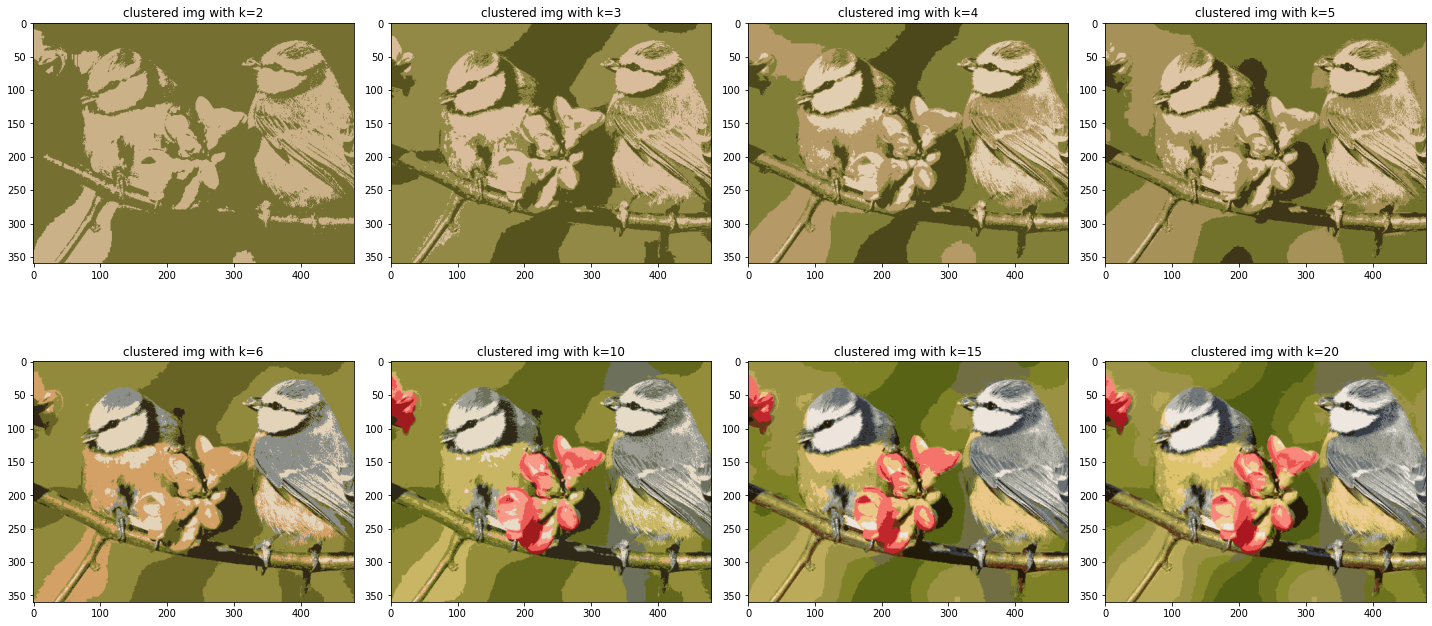

In [24]:
n_centers = [2,3,4,5,6,10,15,20]
cluster_image_vector(img_vecs[0], n_centers, orig_img_shape[0])

c:\users\majid\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.


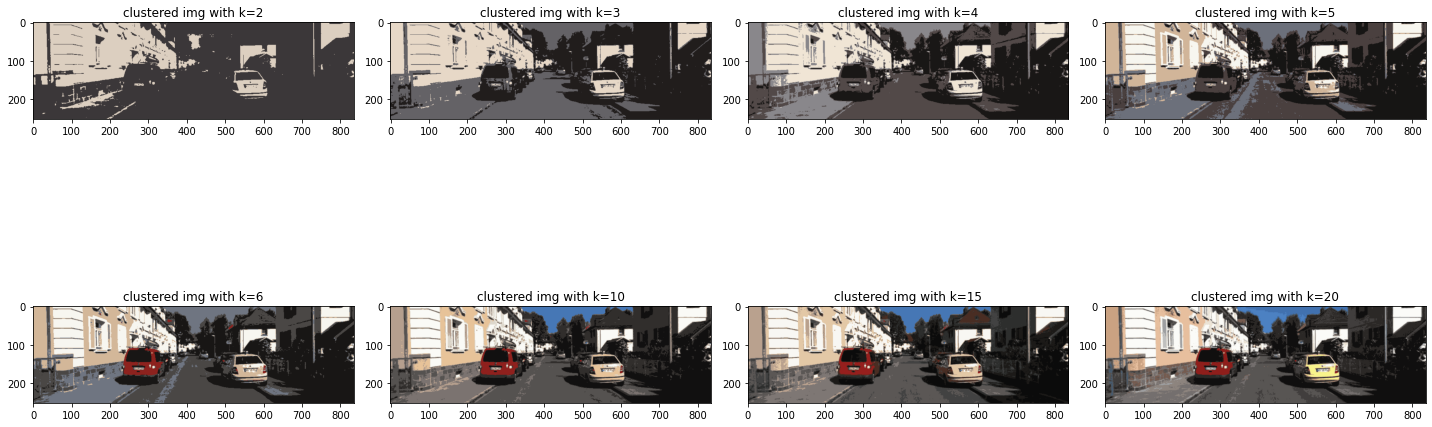

In [25]:
n_centers = [2,3,4,5,6,10,15,20]
cluster_image_vector(img_vecs[1], n_centers, orig_img_shape[1])

c:\users\majid\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: Mean of empty slice.


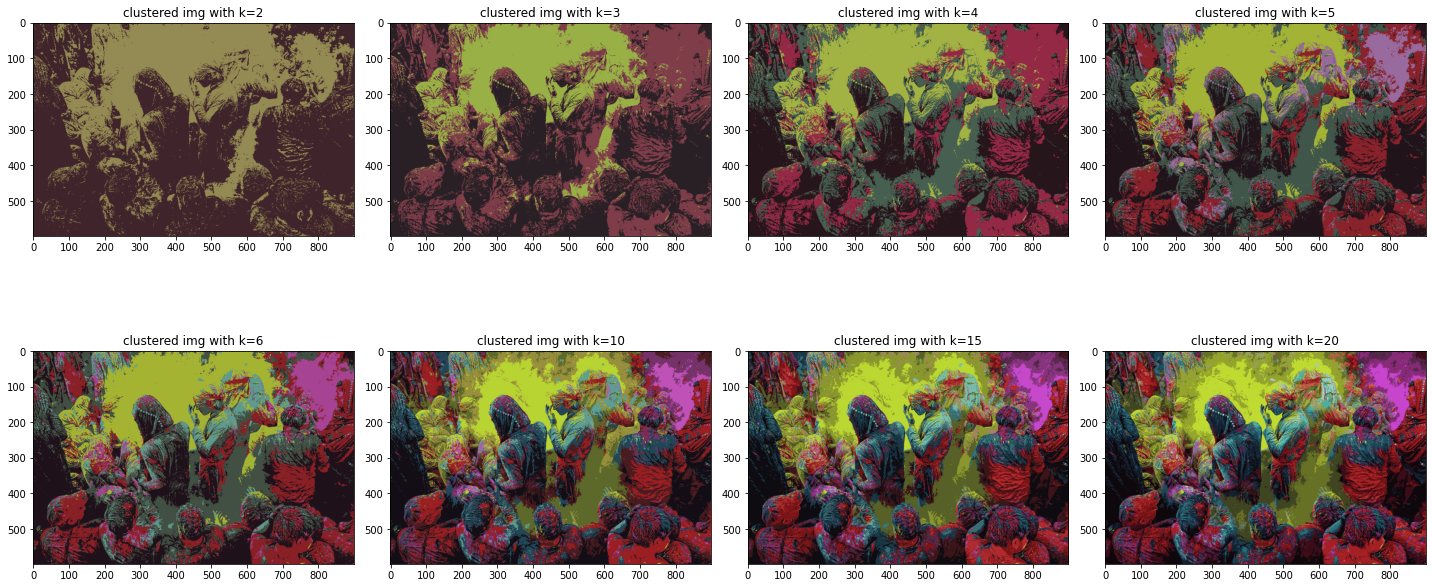

In [26]:
n_centers = [2,3,4,5,6,10,15,20]
cluster_image_vector(img_vecs[2], n_centers, orig_img_shape[2])